In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [2]:
explore = pd.read_csv('../data/clean/future_exploration.csv')
explore.head()

,player,pos,age,tm,g,pg_gs,pg_mp,pg_fg,pg_fga,pg_fg%,...,pos5_PG,pos5_SF,pos5_SG,pct_cap_preds,sal_pred_diff,overunder_sal,pos_5,share_preds,share_pred_diff,overunder_share
0,Steven Adams,C,28,MEM,76,75.0,26,2.8,5.1,0.547,...,0,0,0,0.176559,-0.010922,Fairly Valued,C,0.006133,-0.006133,Less Votes Than Anticipated
1,Grayson Allen,SG,26,MIL,66,61.0,27,3.9,8.6,0.448,...,0,0,1,0.063858,-0.024521,Fairly Valued,SG,0.000054,-0.000054,Number of Votes We Anticipated
2,Jarrett Allen,C,23,CLE,56,56.0,32,6.6,9.7,0.677,...,0,0,0,0.186526,0.007507,Fairly Valued,C,0.201749,-0.201749,Less Votes Than Anticipated
3,Carmelo Anthony,PF,37,LAL,69,3.0,26,4.6,10.5,0.441,...,0,0,0,0.099774,-0.074146,Undervalued,PF,0.000028,-0.000028,Number of Votes We Anticipated
4,Cole Anthony,PG,21,ORL,65,65.0,31,5.5,14.0,0.391,...,1,0,0,0.056224,-0.022759,Fairly Valued,PG,0.000009,-0.000009,Number of Votes We Anticipated


In [6]:
explore.groupby('year')['overunder_sal'].value_counts(normalize=True)

year  overunder_sal
1990  Fairly Valued    0.500000
      Undervalued      0.322581
      Overvalued       0.177419
1991  Fairly Valued    0.546875
      Overvalued       0.226562
      Undervalued      0.226562
1992  Fairly Valued    0.535433
      Undervalued      0.251969
      Overvalued       0.212598
1993  Fairly Valued    0.562500
      Overvalued       0.257812
      Undervalued      0.179688
1994  Fairly Valued    0.412214
      Overvalued       0.381679
      Undervalued      0.206107
1995  Fairly Valued    0.481752
      Undervalued      0.335766
      Overvalued       0.182482
1996  Fairly Valued    0.366906
      Undervalued      0.352518
      Overvalued       0.280576
1997  Fairly Valued    0.426573
      Undervalued      0.356643
      Overvalued       0.216783
1998  Fairly Valued    0.388889
      Undervalued      0.351852
      Overvalued       0.259259
1999  Fairly Valued    0.398374
      Overvalued       0.300813
      Undervalued      0.300813
2000  Fairly Valued 

In [ ]:
df1 = df.filter(items=['ps_wtotl', 'do_psdel', 'state', 'fips'])
df1.head()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
df.plot(kind="scatter", x="ps_wtotl", y="do_psdel", s=10, ax=ax[0])
ax[0].set_xlabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);

#remove outliers for better visual
df1_chk = df1[df1.ps_wtotl < 600]
df1_chk.plot(kind="scatter", x="ps_wtotl", y="do_psdel", s=10, ax=ax[1])
ax[1].set_xlabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);

In [ ]:
X = df1[['ps_wtotl', 'do_psdel']]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

In [ ]:
# Fit a K-means clustering model
km1 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km1.fit(Z)

In [ ]:
df1['cluster'] = km1.labels_
df1.head()

In [ ]:
sns.pairplot(data = df1,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = ['ps_wtotl', 'do_psdel'],
             y_vars = ['ps_wtotl', 'do_psdel'],
             hue = 'cluster');

In [ ]:
centroids = sc.inverse_transform(km1.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=['ps_wtotl', 'do_psdel']
)

plt.figure(figsize=(6, 4))

colors = ["red", "green", "purple", "orange"]
df1['color'] = df1['cluster'].map(lambda p: colors[p])

# Plot points
ax = df1.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    figsize=(10, 8),
    c=df1['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax
)

# Labels
plt.title('Water Supply and Use')
plt.xlabel('Water Amount Withdrawn for Public Supply (Mgal/d)')
plt.ylabel('Domestic Use From Public Supply (Mgal/d)')

# Show the plot
plt.show();

In [ ]:
# Create X and scale it
X = df6[['population', 'median_household_income']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
#e_vec = np.linspace(0.01, 0.7, 100)
#n_vec = np.arange(1, 15)
#res = []

#for e in e_vec:
#    for n in n_vec:
#        cl = DBSCAN(eps=e, min_samples=n)
#        cl.fit(Z)
#        lbls = pd.Series(cl.labels_)
#       if lbls.nunique() <= 1:
#            continue

#        sil = metrics.silhouette_score(Z, cl.labels_)
#        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
#df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
#df_res.sort_values('sil', ascending=False)

In [ ]:
# Instantiate DBSCAN and plot values
db3 = DBSCAN(eps=0.63, min_samples=8)
db3.fit(Z)
plt.scatter(X.population, X.median_household_income, c=db3.labels_)
metrics.silhouette_score(Z, db3.labels_)

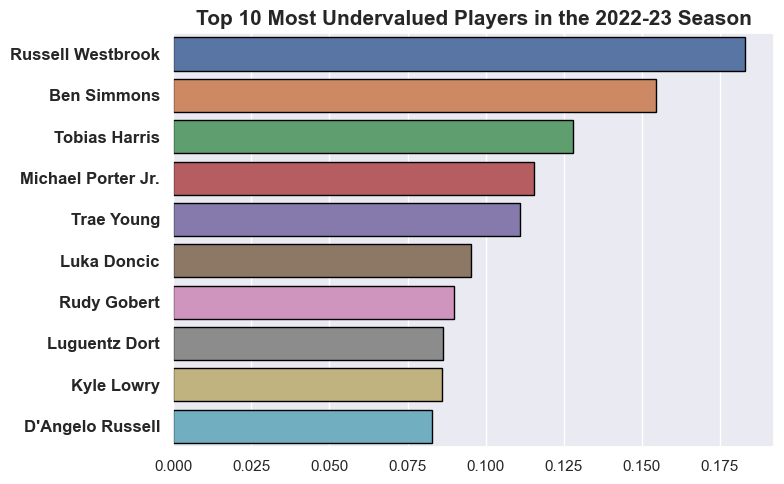

In [22]:
explore = pd.read_csv('../data/clean/future_exploration.csv')
exp22 = explore[explore.year == 2022]
exp22 = exp22.sort_values('sal_pred_diff', ascending = False)
sns.set(style="darkgrid")

plt.figure(figsize = (8,5))
ax = sns.barplot(data=exp22[:10], x='sal_pred_diff', y='player', orient='h', order=exp22[:10]['player'], edgecolor = 'black')

plt.title('Top 10 Most Undervalued Players in the 2022-23 Season', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontweight='bold', fontsize=12)
#ax.set_xlim(0,20)

plt.tight_layout()
#plt.savefig(f'../images/barplot_top10_recievers.png', dpi=300, bbox_inches='tight')
plt.show() 


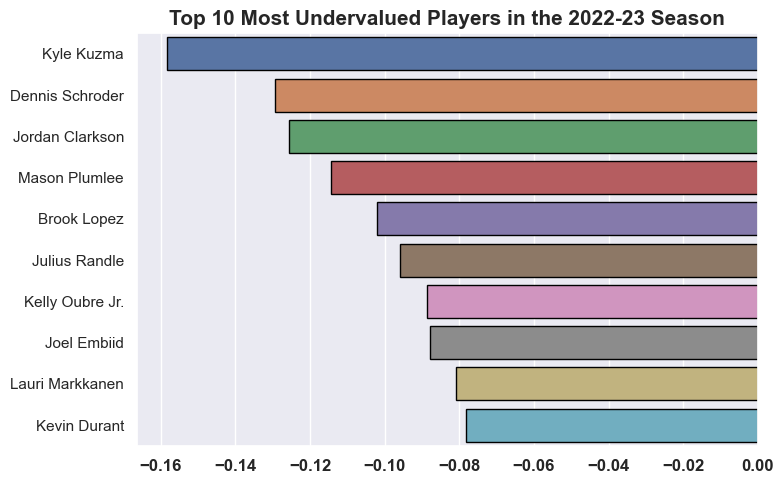

In [27]:
exp22 = pd.read_csv('../data/clean/future_exploration.csv')
exp22 = exp22[exp22['year'] == 2022]
exp22 = exp22.sort_values('sal_pred_diff')
sns.set(style="darkgrid")

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='sal_pred_diff', y='player', data=exp22[:10], edgecolor='black', orient='h')

plt.title('Top 10 Most Undervalued Players in the 2022-23 Season', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontweight='bold', fontsize=12)

plt.tight_layout()
#plt.savefig(f'../images/barplot_top10_recievers.png', dpi=300, bbox_inches='tight')
plt.show()
